Overview of "A Quantum Approximate Optimization Algorithm" written by Edward Farhi, Jeffrey Goldstone and Sam Gutmann.  

# Introduction:

Combinatorial optimization problems attempt to optimize an objective function over *n* bits with respect to *m* clauses.  The bits are grouped into a string $z = z_1z_2...z_n$, while clauses are constraints on a subset of the bits, satisfied for some strings, not satisfied for others.  The objective function, then, is defined as 

\begin{equation} \tag{1}
C(z) = \sum_{\alpha=1}^{m} C_{\alpha}(z)
\end{equation} 

where $C_{\alpha}(z) = 1$ if *z* satisfies clause $\alpha$, and is 0 otherwise.  Note that $C_{\alpha}(z)$ typically will only depend on a few of the bits in the string.  

Now, the goal of approximate optimization is to find a string *z* for which $C(z)$ is close to the maximum value $C$ takes over all strings.  This paper presents a quantum algorithm, paired with classical pre-processing, for approximate optimization.   

A quantum computer with *n* qubits works in a $2^n$ dimensional Hilbert space, with basis vectors denoted by $|z>$ where $z=1,2,3,...2^n$, known as the computational basis.  In this framework, we view $(1)$ as an operator, which is diagonal in the computational basis.  

Next, a few more operators must be defined in order to map the approximate optimization problem onto the quantum comptuer.  First, we define a unitary operator $U(C, \gamma)$, which depends on the objective function $C$ and an angle $\gamma$

\begin{equation} \tag{2}
U(C,\gamma) = e^{-i{\gamma}C} = \prod_{\alpha=1}^{m} e^{-i{\gamma}C_\alpha}
\end{equation} 

The second equality in $(2)$ is permitted since all $C_\alpha$'s commute with another (i.e. they are all diagonal in the same basis).  Note that since $C$ has integer eigenvalues we can restrict the values of $\gamma$ to lie between $0$ and $2\pi$.  
Next, we define an operator $B$, which is the sum of all single bit-flip operators, represented by the Pauli-x matrix


\begin{equation} \tag{3}
B = \sum_{j=1}^{n} \sigma^{x}_j
\end{equation} 

Then we define another angle-dependent unitary operator as a product of commuting one-bit operators

\begin{equation} \tag{4}
U(B,\beta) = e^{-i{\beta}B} = \prod_{j=1}^{n} e^{-i{\beta}\sigma^{x}_j}
\end{equation} 

where $\beta$ takes values between $0$ and $\pi$.  
The initial state of the qubits will be set to a uniform superposition over all computational basis states, defined as:


\begin{equation} \tag{5}
|s> = \frac{1}{2^n} \sum_{z} |z>
\end{equation} 

Next, we define an integer $p \ge 1$ which will set the quality of the approximate optimization; the higher $p$ the better approximation can be attained.  For a given $p$, we define a total of $2p$ angles $\gamma_1 . . . \gamma_p \equiv \pmb\gamma$ and $\beta_1 . . . \beta_p \equiv \pmb\beta$ which will define an angle-dependent quantum state for the qubits

\begin{equation} \tag{6}
|\pmb\gamma, \pmb\beta> = U(B,{\beta}_p)U(C,{\gamma}_p)...U(B,{\beta}_1)U(C,{\gamma}_1)|s>
\end{equation} 

Notice that there are $p$ $C$-dependent unitaries, each of which require $m$ rotation gates on local sets of qubits.  In the worst case, each $C$-dependent unitary must be run in a different "moment" (when referring to a quantum circuit, a moment is essentially one "clock cycle" in which a group of operators acting on various qubits can be performed simulatneously), and thus the $C$-unitaries can be implemented with a circuit depth of $\mathcal{O}(mp)$.  Meanwhile, there are $p$ $B$-dependent unitaries, each of which only involve single qubit-operators and thus can all be applied in one "moment".  Therefore, the $B$-unitaries have a circuit depth of $\mathcal{O}(mp)$.  This means that the final state we seek can be prepared on the quantum computer with a circuit depth of $\mathcal{O}(mp + p)$.  

Next, we define $F_p$ as the expectation value of $C$ in this state:
\begin{equation} \tag{7}
F_p(\pmb\gamma, \pmb\beta) = <\pmb\gamma, \pmb\beta|C|\pmb\gamma, \pmb\beta> 
\end{equation} 

and define the maximum value that $F_p$ takes over all angles as 
\begin{equation} \tag{8}
M_p = max_{\gamma,\beta}F_p(\pmb\gamma, \pmb\beta) 
\end{equation} 



Finally, with all these terms defined, we can lay out an algorithm for approximate optimization. 
1. Pick integer $p$ and determine a set of 2$p$ angles $\{ \pmb\gamma, \pmb\beta \}$ which maximize $F_p$.
2. Prepare the state $|\gamma, \beta>$ on the quantum computer.
3. Measure the qubits in the computational basis to obtain the string $z$ and evaluate $C(z)$
4.  Perform step 3 repeatedly with the same angles to obtain a string $z$ such that $C(z)$ is very near or greater than $F_p(\pmb\gamma, \beta)$

The main roadblock to this algorithm is to find the optimal set of angles $\{ \pmb\gamma, \pmb\beta \}$.  One method, if $p$ does not grow with $n$, is to use brute force by running the quantum computer with values of $\{ \pmb\gamma, \pmb\beta \}$ chosen on a fine grid on the compact set $[0,2\pi]^p \times [0,\pi]^p$ in order to find the values of angles that produce the maximum $F_p$.  The paper also presents a method using classical pre-processing to determine the optimal angles.  However, as this overview is intended to focus on the quantum computational part of the algorithm, we will assume that optimal angles $\{ \pmb\gamma, \pmb\beta \}$ have been determined in *some* fashion, and illustrate in detail how the quantum computing part of this algorithm works. 

# Example Problem: MaxCut for Graphs with Bounded Degree

We will now examine the quantum part of the quantum approximation optimization algorithm (QAOA) using the MaxCut problem for graphs with a bounded degree as an example optimization problem.  The input is a graph with $n$ vertices and an edge set $\{ \langle jk \rangle \}$ of size $m$.  The $n$ vertices are mapped to $n$ qubits, while the $m$ edges of the edge set represent the $m$ clauses of the combinatorial optimization problem.  The goal is to maximize the objective function defined as 

\begin{equation} \tag{9}
C = \sum_{\langle jk \rangle } C_{\langle jk \rangle }
\end{equation} 
  
where 
 
\begin{equation} \tag{9}
C_{\langle jk \rangle } = \frac{1}{2}(-\sigma^z_j \sigma^z_k + 1)
\end{equation} 

Each clause $C_{\langle jk \rangle }$ is thus equal to 1 when qubits $j$ and $k$ have spins pointing in opposite directions along the *z*-direction, and equal to 0 when the spins are in the same direction.  

## MaxCut for Bounded Graph of Degree 2 with 4 Vertices
Below, we give the Cirq implementation of a QAOA for the MaxCut problem for a regular graph of degree 2 with $n=4$ vertices and $m=4$ edges given as $\langle 1,2 \rangle ,\langle 2,3 \rangle ,\langle 3,4 \rangle ,\langle 4,1 \rangle $.  Note that this graph is just a ring. For simplicity, we choose $p=1$ and arbitrarily choose values of $\beta_1$ and $\gamma_1$ (though in a real implementation the optimal angles must be found either by brute force or clever classical pre-processing).
  
To run, press the play button in the upper left-hand corner of the code boxes below.  The code boxes must be run in sequential order, starting with the code box that imports Cirq and other necessary Python libraries.
  


In [1]:
!pip install git+https://github.com/quantumlib/Cirq
import cirq
from cirq.ops import Rx, Ry, Rz, CNOT, Pauli, PauliString
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.linalg

  Cloning https://github.com/quantumlib/Cirq to /tmp/pip-req-build-ceueshc6
  Running command git clone -q https://github.com/quantumlib/Cirq /tmp/pip-req-build-ceueshc6
  Created wheel for cirq: filename=cirq-0.8.0.dev0-cp36-none-any.whl size=1377363 sha256=1977d2b867416c1014705e287cf395ab5685bc6305f40d6919423cf3a6c603b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-elezcins/wheels/c9/f4/ee/029123a49c5e2d75d08c2a9f937e207b88f045901db04632a7
Successfully built cirq


In [7]:
#This code runs the QAOA for the example of MaxCut on a 2-regular graph with 
#n=4 vertices and m=4 clauses
#The graph is a ring


# define the length of grid.
length = 2
nqubits = length**2
# define qubits on the grid.
#in this case we have 4 qubits on a 2x2 grid
qubits = [cirq.GridQubit(i, j) for i in range(length) for j in range(length)]
#instantiate a circuit
circuit = cirq.Circuit()


#apply Hadamard gate to all qubits to define the initial state
#here, the initial state is a uniform superposition over all basis states
circuit.append(cirq.H(q) for q in qubits)

#here, we use p=1
#define optimal angles beta and gamma computed by brute force
#or through classical pre-processing
#beta in [0,pi]
#gamma in [0,2*pi]
beta = 0.2
gamma = 0.4

#define operators for creating state |gamma,beta> = U_B*U_C*|s>
#define U_C operator = Product_<jk> { e^(-i*gamma*C_jk)} and append to main circuit
coeff = -0.5 #coefficient in front of sigma_z operators in the C_jk operator
U_C = cirq.Circuit()
for i in range(0,nqubits):
  U_C.append(CNOT.on(qubits[i],qubits[(i+1)%nqubits]))
  U_C.append(Rz(2.0*coeff*gamma).on(qubits[(i+1)%nqubits]))
  U_C.append(CNOT.on(qubits[i],qubits[(i+1)%nqubits]))
circuit.append(U_C)

#define U_B operator = Product_j {e^(-i*beta*X_j)} and append to main circuit
U_B = cirq.Circuit()
for i in range(0,nqubits):
  U_B.append(cirq.H(qubits[i]))
  U_B.append(Rz(2.0*beta).on(qubits[i]))
  U_B.append(cirq.H(qubits[i]))
circuit.append(U_B)

#add measurement operators for each qubit 
#measure in the computational basis to get the string z
for i in range(0,nqubits):
  circuit.append(cirq.measure(qubits[i],key=str(i)))

#run circuit in simulator to get the state |beta,gamma> and measure in the
#computational basis to get the string z and evaluate C(z)
#repeat for 10 runs and save the best z and C(z)
#simulator = cirq.google.XmonSimulator()
simulator = cirq.Simulator()
reps = 10
results = simulator.run(circuit, repetitions=reps)

#get bit string z from results
best_z = [None]*nqubits
best_Cz = 0.0
for i in range(0,reps):
  z = []
  for j in range (0,nqubits):
    if (results.measurements[str(j)][i]):
      z.append(1)
    else:
      z.append(-1)

  #compute C(z)
  Cz = 0.0
  for j in range(0,nqubits):
    Cz += 0.5*(-1.0*z[j]*z[(j+1)%nqubits] + 1.0)
    
  #store best values for z and C(z)
  if (Cz > best_Cz):
    best_Cz = Cz
    best_z = z
    
#print best string z and corresponding C(z)
print(best_z)
print(best_Cz)

#print a diagram of the circuit
print(circuit)

[1, -1, 1, -1]
4.0
(0, 0): ───H───@─────────────────@───────────────────────────────────────────────X───Rz(-0.127π)───X───H───Rz(0.127π)───H───M('0')───
               │                 │                                               │                 │
(0, 1): ───H───X───Rz(-0.127π)───X───@─────────────────@─────────────────────────┼─────────────────┼───H───Rz(0.127π)───H───M('1')───
                                     │                 │                         │                 │
(1, 0): ───H─────────────────────────X───Rz(-0.127π)───X───@─────────────────@───┼─────────────────┼───H───Rz(0.127π)───H───M('2')───
                                                           │                 │   │                 │
(1, 1): ───H───────────────────────────────────────────────X───Rz(-0.127π)───X───@─────────────────@───H───Rz(0.127π)───H───M('3')───


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Rz was used but is deprecated.
It will be removed in cirq v0.8.0.
Use cirq.rz, instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Rz was used but is deprecated.
It will be removed in cirq v0.8.0.
Use cirq.rz, instead.



## Explanation of Code

In what follows, we give a detailed description of the above code. 
###Define the qubits
First, the number of qubits ($n=4$) is defined on a 2x2 grid and we instantiate the circuit object, which will contain the quantum program we wish to run on the qubits. 
### Prepare the Initial State
Next, we prepare the initial state of the system, a uniform superposition over all basis states.  Thus, we append a Hadamard gate acting on each qubit to the circuit object.  As stated above, $p$ is set to 1 and $\beta$ and $\gamma$ are arbitrarily chosen in this implementation, however, in a real run of the algorithm, one would need to find the optimal values of these angles through brute force or classical pre-processing.  
Next, recall that the goal is to create the state 

\begin{equation} \tag{10}
|\gamma, \beta \rangle = U(B,\beta)U(C,\gamma)|s \rangle
\end{equation} 

Thus, we must define the unitary operators $U(C,\gamma)$ and $U(B,\beta)$ which will be appended to our circuit object, after the state initialization gates (Hadamard gates).  


###Build the operator $U(C, \gamma)$
We begin by building up the operator $U(C, \gamma)$, which is defined as:

\begin{equation} \tag{11}
U(C,\gamma) = e^{-i{\gamma}C} = \prod_{ \langle jk \rangle} e^{-i{\gamma}C_{<jk>}} = \prod_{\langle jk \rangle} e^{-i\frac{\gamma}{2}(-\sigma^z_j\sigma^z_k +1)}
\end{equation} 
  

Examaning the right-hand side of $(11)$, note that we can simplify this by dropping the identity term (the second term in the parantheses in the exponent), as this simple phase term will drop out once we make measurements of the qubits.  Intuitively, an identity operator should have no effect on the system.  Thus, we construct $U(C,\gamma)$ as the following product of exponentials:
  
\begin{equation} \tag{11}
U(C,\gamma) = e^{-i\frac{\gamma}{2}(-\sigma^z_1\sigma^z_2)}e^{-i\frac{\gamma}{2}(-\sigma^z_2\sigma^z_3)}e^{-i\frac{\gamma}{2}(-\sigma^z_3\sigma^z_4)}e^{-i\frac{\gamma}{2}(-\sigma^z_4\sigma^z_1)}
\end{equation} 
  
Each exponential acts on one pair of qubits, and can be translated into a quantum circuit using $Rz(\theta)$ gates, which perform rotations of the spin about the *z*-axis through an angle of $\theta$, and $CNOT$ gates which essentially entangle the two qubits in the pair.  

 As a specific example we examine how the first expoential operator in $(11)$ gets translated into quantum logic gates:
  
\begin{eqnarray*} \tag{12}
    e^{-i\frac{\gamma}{2}(-\sigma^z_1\sigma^z_2)}  & \rightarrow  &         CNOT[1,2]\\
    &  & I[1] \otimes Rz(2*-0.5*\gamma)[2]\\
    &  & CNOT[1,2]
\end{eqnarray*}


  Here the right side indicates three gates are used to perform this operator: the $CNOT$ gate acts on qubits 1 and 2, then an $Rz(\theta)$ gate is acted on qubit 2, and finally, another $CNOT$ gate is acted on qubits 1 and 2.  To show why this works, we simply need to show that the matrix representation of the left and right-hand sides of $(12)$ are the same.
  
We derive the matrix for the left-hand side first.  Since this operator acts on two qubits, it acts on a $2^2 = 4$ dimensional Hilbert space, and thus is represented by a 4x4 matrix.  The term in the exponential, $-i\frac{\gamma}{2}(-\sigma^z_1\sigma^z_2)$, is defined by the tensor product of the two Pauli-z terms multiplied by a coefficient:
  
\begin{equation} \tag{13}
  -i\frac{\gamma}{2}(-\sigma^z_1\sigma^z_2) = i\frac{\gamma}{2}\sigma^z_1 \otimes \sigma^z_2
\end{equation} 
  
Now 
\begin{equation} \tag{14}
  \sigma^z_i = \begin{bmatrix}
    1 & 0\\
    0 & -1
\end{bmatrix}
\end{equation} 
  
So
 
\begin{equation} \tag{15}
  i\frac{\gamma}{2}\sigma^z_1 \otimes \sigma^z_2= 
  i\frac{\gamma}{2}\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & -1 & 0 & 0 \\
    0 & 0 & -1 & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix}
\end{equation} 
  
And thus 
 
\begin{equation} \tag{16}
  e^{i\frac{\gamma}{2}\sigma^z_1 \otimes \sigma^z_2}= 
  \begin{bmatrix}
    e^{i\frac{\gamma}{2}} & 0 & 0 & 0\\
    0 & e^{-i\frac{\gamma}{2}} & 0 & 0 \\
    0 & 0 & e^{-i\frac{\gamma}{2}} & 0 \\
    0 & 0 & 0 & e^{i\frac{\gamma}{2}}
\end{bmatrix}
\end{equation} 
  
Now we derive the matrix representation of the right-hand side of (12).  First the $CNOT$ gate can be written as:

\begin{equation} \tag{17}
  CNOT= 
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\end{equation} 

Next, the $Rz(\theta)$ term is defined as
\begin{equation} \tag{18}
  Rz(\theta)= e^{-iZ\frac{\theta}{2}} = 
  \begin{bmatrix}
    e^{-i\frac{\theta}{2}} & 0 \\
    0 & e^{i\frac{\theta}{2}} 
\end{bmatrix}
\end{equation} 

Thus 

\begin{eqnarray*}  
  I \otimes Rz(2*-0.5*\gamma) & = & 
  \begin{bmatrix}
    1 & 0 \\
    0 & 1 
  \end{bmatrix} \otimes 
  \begin{bmatrix}
    e^{-i\frac{\gamma}{2}} & 0 \\
    0 & e^{i\frac{\gamma}{2}} 
  \end{bmatrix} \\
  & = &  \begin{bmatrix}  \tag{19}
    e^{i\frac{\gamma}{2}} & 0 & 0 & 0\\
    0 & e^{-i\frac{\gamma}{2}} & 0 & 0 \\
    0 & 0 & e^{i\frac{\gamma}{2}} & 0 \\
    0 & 0 & 0 & e^{-i\frac{\gamma}{2}}
\end{bmatrix}
\end{eqnarray*}  

Putting together the three gates we get:


\begin{equation} \tag{20}
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0
\end{bmatrix} * \begin{bmatrix} 
    e^{i\frac{\gamma}{2}} & 0 & 0 & 0\\
    0 & e^{-i\frac{\gamma}{2}} & 0 & 0 \\
    0 & 0 & e^{i\frac{\gamma}{2}} & 0 \\
    0 & 0 & 0 & e^{-i\frac{\gamma}{2}}
\end{bmatrix} *   \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0
\end{bmatrix} =   \begin{bmatrix}
    e^{i\frac{\gamma}{2}} & 0 & 0 & 0\\
    0 & e^{-i\frac{\gamma}{2}} & 0 & 0 \\
    0 & 0 & e^{-i\frac{\gamma}{2}} & 0 \\
    0 & 0 & 0 & e^{i\frac{\gamma}{2}}
\end{bmatrix}
\end{equation} 

Notice the $(20)$ is identical to $(16)$, and thus we have proven that these three gates do indeed implement the first operator in $U(C,\gamma)$.  The other operators are built analogously except that they act on different pairs of qubits.  Once the sub-circuit for $U(C,\gamma)$ is defined, we append it to our main circuit.

###Build the operator $U(B, \beta)$
 
In this example $U(B,\beta)$ is given by 
\begin{equation} \tag{21}
U(B,\beta) = e^{-i{\beta}\sigma^x_1}e^{-i{\beta}\sigma^x_2} e^{-i{\beta}\sigma^x_3} e^{-i{\beta}\sigma^x_4}
\end{equation} 

Again we examine how to convert the first exponential operator into quantum logic gates:
\begin{eqnarray*} \tag{22}
    e^{-i{\beta}\sigma^x_1}  & \rightarrow  &  H[1]\\
    &  & Rz(2*\beta)[1]\\
    &  & H[1]
\end{eqnarray*}

The derivation of this is much simpler.  Note that $\sigma^x$ is diagonal in the x-basis, but not in the computational(z)-basis.  Since exponentiated operators are easy to carry out when the operator is diagonal, we apply a Hadamard gate on the qubit to rotate it into the x-basis, where this operator is now diagonal and represented by the $Rz(\theta)$ gate.  We apply said $Rz(\theta)$ gate to the qubit, and then apply a second Hadamard gate to the qubit to rotate it back into the computational basis.  Analogous gate sets are applied to all other qubits to carry out the full $U(B,\beta)$ operator.  Once the sub-circuit for $U(B,\beta)$ is defined, we append it to our main circuit.

###Measurement and Simulation
At this point, the main circuit now contains gates for initial state preparation and application of the $U(C,\gamma)$ and $U(B,\beta)$ unitary operators to get us into the final state 
\begin{equation} \tag{23}
|\gamma, \beta \rangle = U(B,\beta)U(C,\gamma)|s \rangle
\end{equation} 

The next step of the algorithm is to measure each of the qubits to get the string $z$ and then evaluate $C(z)$.  Measurement is performed by appending a measurement operator on the computational basis to each of the qubits in our main circuit.  A simulation is carried out by instantiating a Simulator.  We then input the main circuit to this simulator, and since we will want to run this circuit many times, we can give an optional argument for the number of repetitions (in this case, 10).  

The circuit will then be simulated 10 times.  The paper says that $m log(m)$ repetitions should suffice, and since in this case $m=4$, 10 repetitions are more than enough. The results of all runs are stored in the variable "results".  We can then evaluate the value of $C(z)$ for each of the runs and keep a running tab on which string $z$ gives the maximum value of $C(z)$, each of which is printed at the end of the program.  A diagram of the circuit is also output at the end of the program to give the reader a clearer understanding of the program that is being run on the quantum computer.

To understand how this approximates the optimization of the MaxCut problem, note that $z = z_1z_2...z_n$ is a string, where each $z_i$ equals 0 or 1.  In the MaxCut problem, one wants to find a subset of the vertices $S$ such that the number of edges between $S$ and the complementary subset is maximal.  The final $z$ string we measure defines whether each vertex $i$ is in the subset $S$ (say, $z_i = 1$) or in the complement ($z_i = 0$).  $C(z)$ gives the number of edges that exist between the subset S and its complement.  So in our example, the 4-vertex ring, after enough repetitions, our QAOA finds the correct maximum cut of $C(z)=4$ and returns a string of alternating 0's and 1's, indicating the graph is maximally cut when alternating vertices are grouped into subsets.  This toy example was small and simple, which is why the QAOA was able to return the true optimal solution.  However, in more complex combinatorial optimization problems, this will not always be the case.  It may be necessary to increase the value of $p$, which in this simple case we took to just be 1.  
  
## MaxCut for Bounded Graph of Degree 2 with 16 Vertices and Brute Force Angle Optimization
  
In the previous example with 4 vertices, the algorithm almost always returned the optimal cut, despite our random selection of values for $\beta$ and $\gamma$.  Clearly, the problem was so small that the search space of possible solutions was easily navigated over the repeated runs.  However, if we move to a larger problem with 16 vertices, it becomes more important to find optimal values for $\beta$ and $\gamma$ in order to find the optimal cut with high probability.  
  
Below is some code that performs a grid search over values for the angles to find their optimal values.  Now, since $m=16$ it becomes necessary to increase the number of repetitions each circuit is run for to be $\mathcal{O}(16log(16))$.  We, therefore, increase the number of repetitions to 20 in an attempt to keep it low enough for the code below not to take more than 5 minutes to run.  Upon completion, that program prints the resulting optimal values for $\beta$, $\gamma$, $C(z)$, and $z$.  It also plots a graph of how the value of $C(z)$ changes throughout the grid search as various values of $\beta$ and $\gamma$ are swept through.  It is clear from the plot that there is indeed an important angle-dependence now that our problem has more vertices, and thus resides in a larger search space.  
  
  
**Note: Code below may take up to 5 minutes to run!**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: Rz was used but is deprecated.
It will be removed in cirq v0.8.0.
Use cirq.rz, instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: Rz was used but is deprecated.
It will be removed in cirq v0.8.0.
Use cirq.rz, instead.



[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1]
16.0
1.0471975511965976
2.0943951023931953


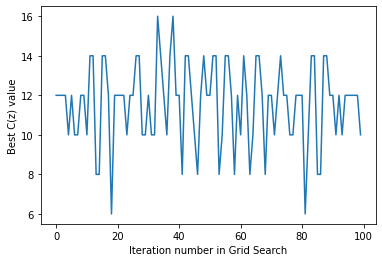

In [9]:
#This code runs the QAOA, including optimization of the angles beta and gammer
#for the example of MaxCut on a 2-regular graph with n=16 vertices and m=16 clauses
#Brute force optimization of the angles beta ang gamma is performed by 
#a grid search over their possible values


# define the length of grid.
length = 4
nqubits = length**2
# define qubits on the grid.
#in this case we have 16 qubits on a 4x4 grid
qubits = [cirq.GridQubit(i, j) for i in range(length) for j in range(length)]

#here, we use p=1
#search for optimal angles beta and gamma by brute force
#beta in [0,pi]
#gamma in [0,2*pi]
gridsteps = 9
bstep = np.pi/gridsteps
gstep = 2.0*np.pi/gridsteps
overall_best_z = []*nqubits
overall_best_Cz = 0.0
all_Cz = []
for b in range(0,gridsteps+1):
  for g in range(0,gridsteps+1):
    beta = bstep*b
    gamma = gstep*g
   
   #instantiate a circuit
    circuit = cirq.Circuit()
    #apply Hadamard gate to all qubits to define the initial state
    #here, the initial state is a uniform superposition over all basis states
    circuit.append(cirq.H(q) for q in qubits)

    #define operators for creating state |gamma,beta> = U_B*U_C*|s>
    #define U_C operator = Product_<jk> { e^(-i*gamma*C_jk)} and append to main circuit
    coeff = -0.5 #coefficient in front of sigma_z operators in the C_jk operator
    U_C = cirq.Circuit()
    for i in range(0,nqubits):
      U_C.append(CNOT.on(qubits[i],qubits[(i+1)%nqubits]))
      U_C.append(Rz(2.0*coeff*gamma).on(qubits[(i+1)%nqubits]))
      U_C.append(CNOT.on(qubits[i],qubits[(i+1)%nqubits]))
    circuit.append(U_C)

    #define U_B operator = Product_j {e^(-i*beta*X_j)} and append to main circuit
    U_B = cirq.Circuit()
    for i in range(0,nqubits):
      U_B.append(cirq.H(qubits[i]))
      U_B.append(Rz(2.0*beta).on(qubits[i]))
      U_B.append(cirq.H(qubits[i]))
    circuit.append(U_B)

    #add measurement operators for each qubit 
    #measure in the computational basis to get the string z
    for i in range(0,nqubits):
      circuit.append(cirq.measure(qubits[i],key=str(i)))

    #run circuit in simulator to get the state |beta,gamma> and measure in the
    #computational basis to get the string z and evaluate C(z)
    #repeat for 20 runs and save the best z and C(z)
    #simulator = cirq.google.XmonSimulator()
    simulator = cirq.Simulator()
    reps = 20
    results = simulator.run(circuit, repetitions=reps)

    #get bit string z from results
    best_z = [None]*nqubits
    best_Cz = 0.0
    for i in range(0,reps):
      z = []
      for j in range (0,nqubits):
        if (results.measurements[str(j)][i]):
          z.append(1)
        else:
          z.append(-1)

      #compute C(z)
      Cz = 0.0
      for j in range(0,nqubits):
        Cz += 0.5*(-1.0*z[j]*z[(j+1)%nqubits] + 1.0)

      #store best values for z and C(z)
      if (Cz > best_Cz):
        best_Cz = Cz
        best_z = z
    all_Cz.append(best_Cz)    
    if (best_Cz > overall_best_Cz):
      overall_best_Cz = best_Cz
      overall_best_z = best_z
      best_beta = beta
      best_gamma = gamma
        
        
    
#print best string z and corresponding C(z)
print(overall_best_z)
print(overall_best_Cz)
print(best_beta)
print(best_gamma)

plt.plot(all_Cz)
plt.xlabel("Iteration number in Grid Search")
plt.ylabel("Best C(z) value")
plt.show()

In [10]:
#Examination of <z1|U_B|z2> and <z1|U_B|z2> for 2 bit strings
beta = 1.2
gamma = 2.8
k = 1j*gamma/2.0

Rx = np.array([[np.cos(beta/2.0), -1j*np.sin(beta/2.0)], [-1j*np.sin(beta/2.0), np.cos(beta/2.0)]])
B1 = np.kron(Rx,np.eye(2))
B2 = np.kron(np.eye(2),Rx)
U_B = np.matmul(B1,B2)

U_C = np.array([[cmath.exp(k),0,0,0], [0,cmath.exp(-k),0,0],[0,0,cmath.exp(-k),0],[0,0,0,cmath.exp(k)]])


print("<z1|U_B|z2>")
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for l in range(0,2):
        z1 = np.array([i,j])
        z2 = np.array([k,l])
        num1 = z1[0] + 2*z1[1]
        num2 = z2[0] + 2*z2[1]
        ket = np.zeros(4)
        ket[num1] = 1
        bra = np.zeros(4)
        bra[num2] = 1
        opB_ket = U_B.dot(ket)
        bra_opB_ket = bra.conjugate().dot(opB_ket)
        print(bra_opB_ket)

print("<z1|U_C|z2>")
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for l in range(0,2):
        z1 = np.array([i,j])
        z2 = np.array([k,l])
        num1 = z1[0] + 2*z1[1]
        num2 = z2[0] + 2*z2[1]
        ket = np.zeros(4)
        ket[num1] = 1
        bra = np.zeros(4)
        bra[num2] = 1
        opC_ket = U_C.dot(ket)
        bra_opC_ket = bra.conjugate().dot(opC_ket)
        print(bra_opC_ket)
   

<z1|U_B|z2>
(0.6811788772383368+0j)
-0.4660195429836132j
-0.4660195429836132j
(-0.31882112276166324+0j)
-0.4660195429836132j
(0.6811788772383368+0j)
(-0.31882112276166324+0j)
-0.4660195429836132j
-0.4660195429836132j
(-0.31882112276166324+0j)
(0.6811788772383368+0j)
-0.4660195429836132j
(-0.31882112276166324+0j)
-0.4660195429836132j
-0.4660195429836132j
(0.6811788772383368+0j)
<z1|U_C|z2>
(0.16996714290024104+0.9854497299884601j)
0j
0j
0j
0j
(0.16996714290024104-0.9854497299884601j)
0j
0j
0j
0j
(0.16996714290024104-0.9854497299884601j)
0j
0j
0j
0j
(0.16996714290024104+0.9854497299884601j)


In [11]:
#Examination of <z1|U_B|z2> and <z1|U_B|z2> for 3 bit strings
beta = 1.4
gamma = 3.9
k = 1j*gamma/2.0

Sz = np.array(([1,0],[0,-1]))
Rx = np.array([[np.cos(beta/2.0), -1j*np.sin(beta/2.0)], [-1j*np.sin(beta/2.0), np.cos(beta/2.0)]])
B1 = np.kron(np.eye(2),np.eye(2))
B1 = np.kron(Rx,B1)
B2 = np.kron(Rx,np.eye(2))
B2 = np.kron(np.eye(2), B2)
B3 = np.kron(np.eye(2), Rx)
B3 = np.kron(np.eye(2),B3)
U_B = np.matmul(B1,B2,B3)

U_C12 = np.kron(Sz, np.eye(2))
U_C12 = (1j*gamma/2.0)*np.kron(Sz, U_C12)
U_C12 = scipy.linalg.expm(U_C12)  
U_C23 = np.kron(Sz,Sz)
U_C23 = (1j*gamma/2.0)*np.kron(np.eye(2), U_C23)
U_C23 = scipy.linalg.expm(U_C23) 
U_C31 = np.kron(np.eye(2), Sz)
U_C31 = (1j*gamma/2.0)*np.kron(Sz, U_C31)
U_C31 = scipy.linalg.expm(U_C31) 
U_C = np.matmul(U_C23,U_C31)
U_C = np.matmul(U_C12,U_C)

U_BC = np.matmul(U_B,U_C)

print("<z1|U_B|z2>")
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for l in range(0,2):
        for n in range(0,2):
          for m in range(0,2):
            z1 = np.array([i,j,k])
            z2 = np.array([l,m,n])
            num1 = 4*z1[0] + 2*z1[1] + z1[2]
            num2 = 4*z2[0] + 2*z2[1] + z2[2]
            ket = np.zeros(8)
            ket[num1] = 1
            bra = np.zeros(8)
            bra[num2] = 1
            opB_ket = U_B.dot(ket)
            bra_opB_ket = bra.conjugate().dot(opB_ket)
            #print(bra_opB_ket)

print("<z1|U_C|z2>")           
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for l in range(0,2):
        for n in range(0,2):
          for m in range(0,2):
            z1 = np.array([i,j,k])
            z2 = np.array([l,m,n])
            num1 = 4*z1[0] + 2*z1[1] + z1[2]
            num2 = 4*z2[0] + 2*z2[1] + z2[2]
            ket = np.zeros(8)
            ket[num1] = 1
            bra = np.zeros(8)
            bra[num2] = 1
            opC_ket = U_C.dot(ket)
            bra_opC_ket = bra.conjugate().dot(opC_ket)
            #print(bra_opC_ket)

print("<z1|U_BC|z2>")           
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for l in range(0,2):
        for n in range(0,2):
          for m in range(0,2):
            z1 = np.array([i,j,k])
            z2 = np.array([l,m,n])
            num1 = 4*z1[0] + 2*z1[1] + z1[2]
            num2 = 4*z2[0] + 2*z2[1] + z2[2]
            ket = np.zeros(8)
            ket[num1] = 1
            bra = np.zeros(8)
            bra[num2] = 1
            opBC_ket = U_BC.dot(ket)
            bra_opBC_ket = bra.conjugate().dot(opBC_ket)
            print(bra_opBC_ket)

<z1|U_B|z2>
<z1|U_C|z2>
<z1|U_BC|z2>
(0.530950557173974-0.24555505432221317j)
(-0.2068281690195804-0.44721348490803614j)
0j
0j
(-0.2068281690195804-0.44721348490803614j)
(-0.3766827219244395+0.1742089635176464j)
0j
0j
0j
0j
(-0.2165497048062506-0.5434261718162496j)
(-0.45772155016036+0.1823973001510147j)
0j
0j
(-0.45772155016036+0.1823973001510147j)
(0.15363112654503636+0.38553354318761973j)
(-0.45772155016036+0.18239730015101469j)
(-0.21654970480625058-0.5434261718162496j)
0j
0j
(0.15363112654503633+0.38553354318761973j)
(-0.45772155016036+0.18239730015101469j)
0j
0j
0j
0j
(-0.45772155016036+0.18239730015101469j)
(-0.21654970480625058-0.5434261718162496j)
0j
0j
(0.15363112654503633+0.38553354318761973j)
(-0.45772155016036+0.18239730015101469j)
(-0.45772155016036+0.18239730015101469j)
(0.15363112654503633+0.38553354318761973j)
0j
0j
(-0.21654970480625058-0.5434261718162496j)
(-0.45772155016036+0.18239730015101469j)
0j
0j
0j
0j
(-0.45772155016036+0.18239730015101469j)
(0.153631126545036